### Principal Component Analysis applied to the Iris dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn.cross_validation import cross_val_score

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [2]:
# Load in the data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length','sepal_width','petal_length','petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [47]:
# Create X
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
target_names = iris.species
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
# all features and response need to be numbers for scikit-learn
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
y = iris.species_num

In [49]:
#Let's reduce it to three components
pca3 = decomposition.PCA(n_components=3)
X_trf_3 = pca3.fit_transform(X)
print(X_trf_3[0:5])

[[-2.68420713 -0.32660731  0.02151184]
 [-2.71539062  0.16955685  0.20352143]
 [-2.88981954  0.13734561 -0.02470924]
 [-2.7464372   0.31112432 -0.03767198]
 [-2.72859298 -0.33392456 -0.0962297 ]]


In [50]:
pca3.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514])

In [51]:
pca3.explained_variance_ratio_.sum()

0.99481691454981014

In [52]:
#Let's reduce it to two components
pca2 = decomposition.PCA(n_components=2)
X_trf_2 = pca2.fit_transform(X)
pca2.explained_variance_ratio_.sum()

0.97763177502480336

In [53]:
#Let's reduce it to one components
pca1 = decomposition.PCA(n_components=1)
X_trf_1 = pca1.fit_transform(X)
pca1.explained_variance_ratio_.sum()

0.9246162071742684

In [54]:
#all components (includes all of the original features)
pca_all = decomposition.PCA() # alternate way to use all 4 components: decomposition.PCA(n_components=4)
X_trf_all = pca_all.fit_transform(X)
pca_all.explained_variance_ratio_.sum()

1.0

explained variance ratio (all 4 components):  [ 0.92461621  0.05301557  0.01718514  0.00518309]
sum of explained variance ratio (all 4 components):  1.0


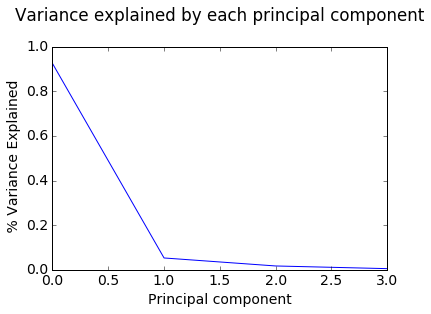

In [55]:
#Choosing components
pca4 = decomposition.PCA(n_components=4)
X_trf = pca4.fit_transform(X)

print 'explained variance ratio (all 4 components): ', pca4.explained_variance_ratio_
print 'sum of explained variance ratio (all 4 components): ', pca4.explained_variance_ratio_.sum()
plt.cla()
plt.plot(pca4.explained_variance_ratio_)
plt.title('Variance explained by each principal component\n')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

In [56]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
log_reg = logistic.fit(X,y)
scores = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy')
scores.mean()

0.95333333333333337

In [57]:
pipe_trf_3 = Pipeline([('pca_3', decomposition.PCA(n_components=3)),
                 ('logistic', LogisticRegression())])
scores_trf_3 = cross_val_score(pipe_trf_3, X, y, cv=10, scoring='accuracy')
scores_trf_3.mean()

0.91333333333333333

In [58]:
pipe_trf_2 = Pipeline([('pca_2', decomposition.PCA(n_components=2)),
                 ('logistic', LogisticRegression())])
scores_trf_2 = cross_val_score(pipe_trf_2, X, y, cv=10, scoring='accuracy')
scores_trf_2.mean()

0.90000000000000002

In [59]:
# fits PCA, transforms data, fits the Logistic Regression mode with one component, and scores accuracy
# on the transformed data
from sklearn.pipeline import Pipeline
pipe_trf_1 = Pipeline([('pca_1', decomposition.PCA(n_components=1)),
                 ('logistic', LogisticRegression())])
scores_trf_1 = cross_val_score(pipe_trf_1, X, y, cv=10, scoring='accuracy')
scores_trf_1.mean()

0.89333333333333331

In [60]:
pipe_trf_4 = Pipeline([('pca_4', decomposition.PCA(n_components=4)),
                 ('logistic', LogisticRegression())])
scores_trf_4 = cross_val_score(pipe_trf_4, X, y, cv=10, scoring='accuracy')
scores_trf_4.mean()

0.90666666666666662

In [66]:
pipe_trf_2 = Pipeline([('pca_2', decomposition.PCA(n_components=2)),
                 ('logistic', LogisticRegression())])
scores_trf_2 = cross_val_score(pipe_trf_2, X, y, cv=10, scoring='accuracy')
scores_trf_2.mean()

0.90000000000000002

In [65]:
# Turn it back into its 4 components using only 2 principal components
X_reconstituted2 = pca2.inverse_transform(X_trf_2)
##pipe_trf_recon2 = Pipeline([('pca_4', decomposition.PCA(n_components=4)),
##                 ('logistic', LogisticRegression())])
scores_trf_recon2 = cross_val_score(pipe_trf_recon2, X_reconstituted2, y, cv=10, scoring='accuracy')
scores_trf_recon2.mean()

0.90000000000000002

In [61]:
# Turn it back into its 4 components using only 2 principal components
X_reconstituted2 = pca2.inverse_transform(X_trf_2)
scores_trf_recon2 = cross_val_score(log_reg, X_reconstituted2, y, cv=10, scoring='accuracy')
scores_trf_recon2.mean()

0.96666666666666679

In [62]:
# Turn it back into its 4 components using only 1 principal components
X_reconstituted1 = pca1.inverse_transform(X_trf_1)
scores_trf_recon1 = cross_val_score(log_reg, X_reconstituted1, y, cv=10, scoring='accuracy')
scores_trf_recon1.mean()

0.92000000000000015

In [64]:
# Turn it back into its 4 components using only 3 principal components
X_reconstituted3 = pca3.inverse_transform(X_trf_3)
scores_trf_recon3 = cross_val_score(log_reg, X_reconstituted3, y, cv=10, scoring='accuracy')
scores_trf_recon3.mean()

0.96666666666666679